In [144]:
#Import Python Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from IPython.display import display, HTML
import os
path = 'C:\Projects\BHP'
os.chdir(path)

In [17]:
# load data##############################################################################
df1 = pd.read_csv('Bengaluru_House_Data.csv')

df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [21]:
# get columns names
cols=df1.columns
print("Columns: ", cols)

Columns:  Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [19]:
# Get dimensions
df1.shape

(13320, 9)

In [68]:
# get unique area_type
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [69]:
# get count for each area_type
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [115]:
# Dropping features which are not useful for model
df2 = df1.drop(['area_type', 'availability','society'], axis='columns')
df2.shape

(13320, 6)

In [116]:
# Get null rows count
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [117]:
print('\nColumnName, DataType, MissingValues')
cols2 = df2.columns
for i in cols2:
    print(i, ',', df2[i].dtype,',',df2[i].isnull().any())



ColumnName, DataType, MissingValues
location , object , True
size , object , True
total_sqft , object , False
bath , float64 , True
balcony , float64 , True
price , float64 , False


In [118]:
# replace missing values in numerical variables by using mean value for bath and balcony features
df2["bath"].fillna(df2["bath"].mean(), inplace=True)
df2["balcony"].fillna(df2["balcony"].mean(), inplace=True)
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [119]:
# dropping NA records of size and location
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [120]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [121]:
# Creating new column just by considering int values from size feature
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3['bhk'].unique()
df3 = df3.drop(['size'], axis='columns')

<ipython-input-121-7ad612bb7cd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [122]:
df3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [123]:
df3.shape

(13303, 6)

In [94]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [95]:
# could observe 43 bhk in  2400 sq ft home which looks bit strange
df3[df3.bhk>20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [102]:
# Exploring total_sqft
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# Above shows that total_sqft can be a range (e.g. 2100-2850), 34.46sq. Meter, 4125 Perch etc
# Which shows non-uniformalities of total_sqft values.
df3[~df3['total_sqft'].apply(is_float)].head(15)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.00000,0.000000,186.000,4
56,Devanahalli,3010 - 3410,2.69261,1.584376,192.000,4
81,Hennur Road,2957 - 3450,2.69261,1.584376,224.500,4
122,Hebbal,3067 - 8156,4.00000,0.000000,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.00000,0.000000,54.005,2
165,Sarjapur,1145 - 1340,2.00000,0.000000,43.490,2
188,KR Puram,1015 - 1540,2.00000,0.000000,56.800,2
224,Devanahalli,1520 - 1740,2.69261,1.584376,74.820,3
410,Kengeri,34.46Sq. Meter,1.00000,0.000000,18.500,1
549,Hennur Road,1195 - 1440,2.00000,0.000000,63.770,2


In [ ]:
# Above shows that total_sqft can be a range (e.g. 2100-2850). 
# For such case we can just take average of min and max value in the range. 
# There are other cases such as 34.46Sq. Meter, 4125Perch  which can convert to square ft using unit conversion. 
# I am going to just drop such corner cases to keep things simple.

In [125]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
   

df4 = df3.copy()
# Coverting sqft inti num by taking average
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
# Fetching only non null rows by ignoring other cases.
df4 = df4[df4['total_sqft'].notnull()]
df4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [130]:
# Here total_sqft is 2475 which is an average of 2100 - 2850
df4.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
balcony               0
price               186
bhk                   4
Name: 30, dtype: object

In [128]:
df4.shape

(13257, 6)

In [ ]:
# Feature Engineering ######################################################

In [131]:
# Adding new feature called price per square feet
# and price is in lak rupees so multiplying 1 lak into calculation
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [132]:
# Checking descriptive statistics
price_sqft_stats = df5['price_per_sqft'].describe()
price_sqft_stats

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [133]:
df5.to_csv("bhp.csv",index=False)

In [134]:
# Dimensionality Reduction of categorical variable location to reduce locations
# checking how many unique locations present
len(df5['location'].unique())

1298

In [138]:
# Removing trailing or leading spaces from location
df5['location'] = df5['location'].apply(lambda x: x.strip())
# How many data points are avilable per location
#location_stats = df5['location'].value_counts(ascending=False)
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [140]:
# How many locations have data points less than or equal to 10
len(location_stats[location_stats <= 10])

1047

In [141]:
# There are 1047 locations have data points less than 10 can be considered them under location -> 'Other'
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Ganga Nagar             10
Dairy Circle            10
Sadashiva Nagar         10
Naganathapura           10
Sector 1 HSR Layout     10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [143]:
# Dimensionality Reduction
# Any location having less than 10 data points should be tagged as "other" location. 
# This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, 
# it will help us with having fewer dummy columns
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

241

In [145]:
# calculate correlations
correlations = df5.corr(method='pearson')
print("\nData correlations")
display(HTML(correlations.to_html()))

# The bhk, balcony, price_per_sqft has weak correlations


Data correlations


,total_sqft,bath,balcony,price,bhk,price_per_sqft
total_sqft,1.000000,0.391535,0.136299,0.575632,0.348146,-0.008245
bath,0.391535,1.000000,0.182292,0.455272,0.896523,0.030883
balcony,0.136299,0.182292,1.000000,0.103994,0.169898,0.004548
price,0.575632,0.455272,0.103994,1.000000,0.397963,0.028373
bhk,0.348146,0.896523,0.169898,0.397963,1.000000,0.030906
price_per_sqft,-0.008245,0.030883,0.004548,0.028373,0.030906,1.000000


In [148]:
# Applying transformation to check for improvement

price = df5['price']

bhk = df5['bhk']
print("\n Trnsformation on bhk")
print('Original:', price.corr(bhk))
bhklog = np.log(bhk)
print('Log:', price.corr(bhklog))
bhksqrt = np.sqrt(bhk)
print('sqrt:', price.corr(bhksqrt))
bhkinv = 1/bhk
print('inverse:', price.corr(bhkinv))


 Trnsformation on bhk
Original: 0.3979633217668325
Log: 0.41356082624444446
sqrt: 0.42078620691194085
inverse: -0.34641073572904796


In [149]:
# Applying transformation to check for improvement of balcony

balcony = df5['balcony']
print("\n Trnsformation on balcony")
print('Original:', price.corr(balcony))
balconylog = np.log(balcony)
print('Log:', price.corr(balconylog))
balconysqrt = np.sqrt(balcony)
print('sqrt:', price.corr(balconysqrt))
balconyinv = 1/balcony
print('inverse:', price.corr(balconyinv))


 Trnsformation on balcony
Original: 0.10399388504700575
Log: nan
sqrt: 0.076910997803274
inverse: nan


C:\Users\priya\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [155]:
# No improvement in correlation with balcony so dropping it from dataframe
df5 = df5.drop(['balcony'],axis='columns')
df5.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


In [156]:
df10.shape

(13257, 5)

In [166]:
# Outlier Removal Using Business Logic

df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [167]:
# We could observe that data points have 6 bhk apartment with 1020 sqft. 
# Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely.

df5.shape

(13257, 6)

In [168]:
# Removing data points having bedroom squre foot less than threshold 300
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)]
df6.shape

(12513, 6)

In [169]:
# Outlier detection with decriptive statistics mean and std of price_per_sqft
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [170]:
# Here we could see that min price per sqft is 267 and max is 176470 which shows wide variation in property price
# Removing outliers per location using mean and std
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_outliers(df6)
df7.shape

(10288, 6)

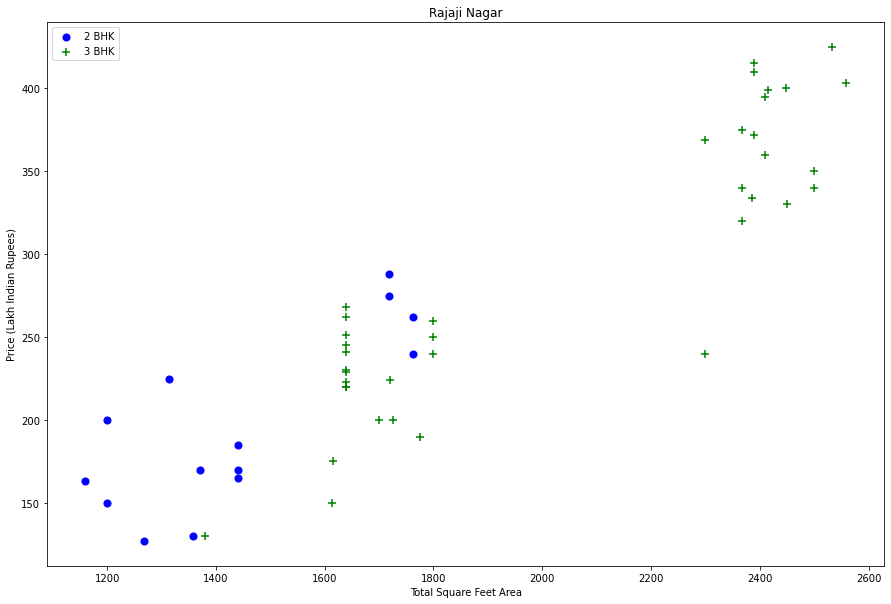

In [181]:
# checking if for a given location how does the 2 BHK and 3 BHK property prices look like using scatter plot
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

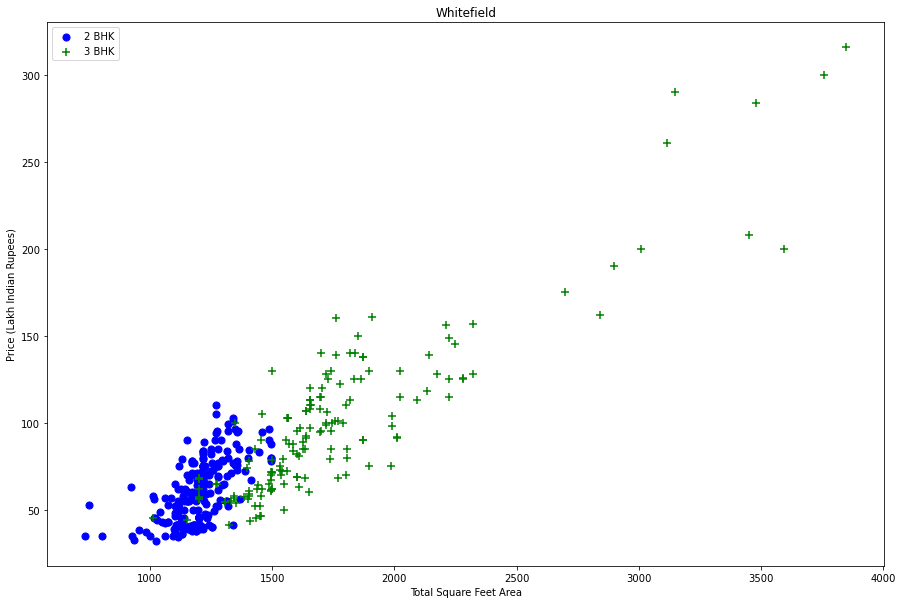

In [182]:
plot_scatter_chart(df7,"Whitefield")

In [183]:
# we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)

df8.shape

(7342, 6)

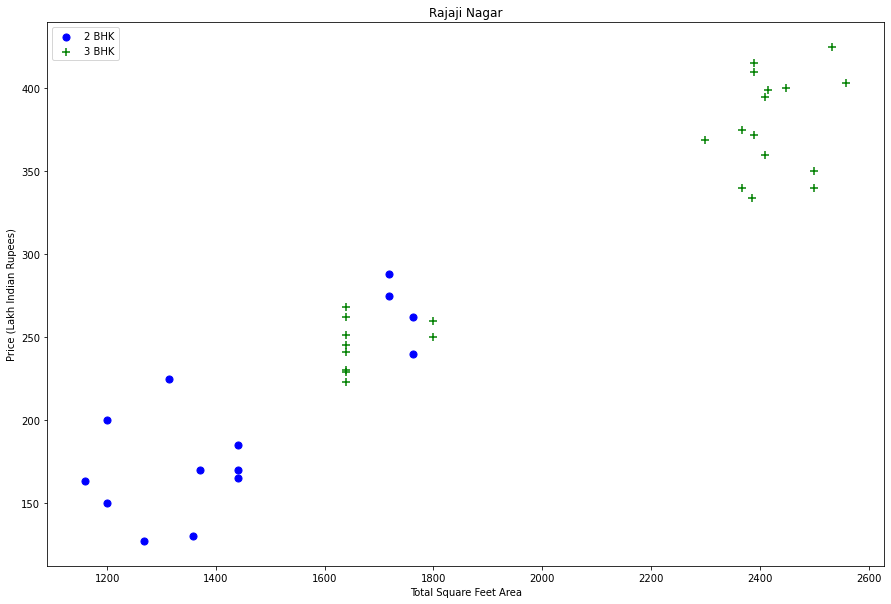

In [185]:
# Plotting scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK propertie
plot_scatter_chart(df8,"Rajaji Nagar")

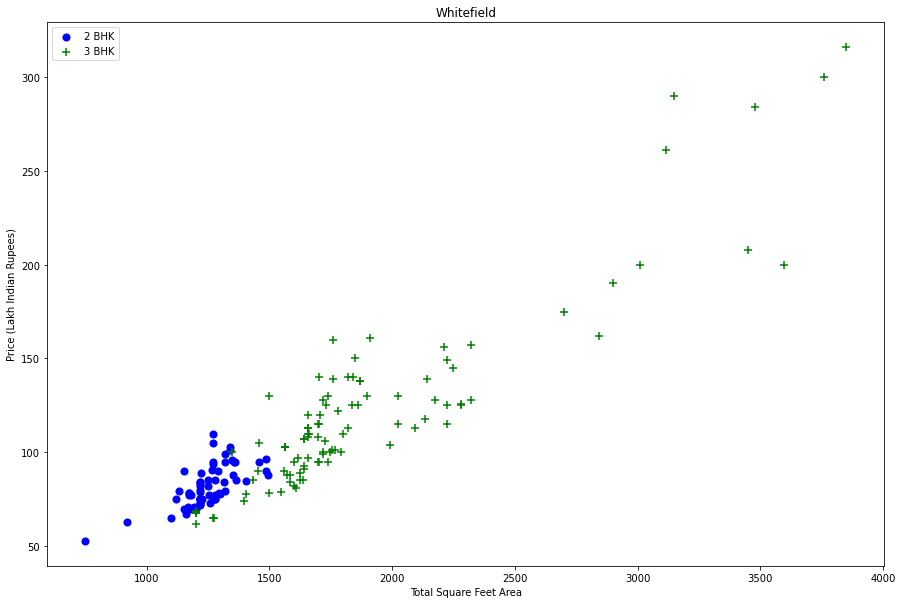

In [186]:
plot_scatter_chart(df8,"Whitefield")

Text(0, 0.5, 'Count')

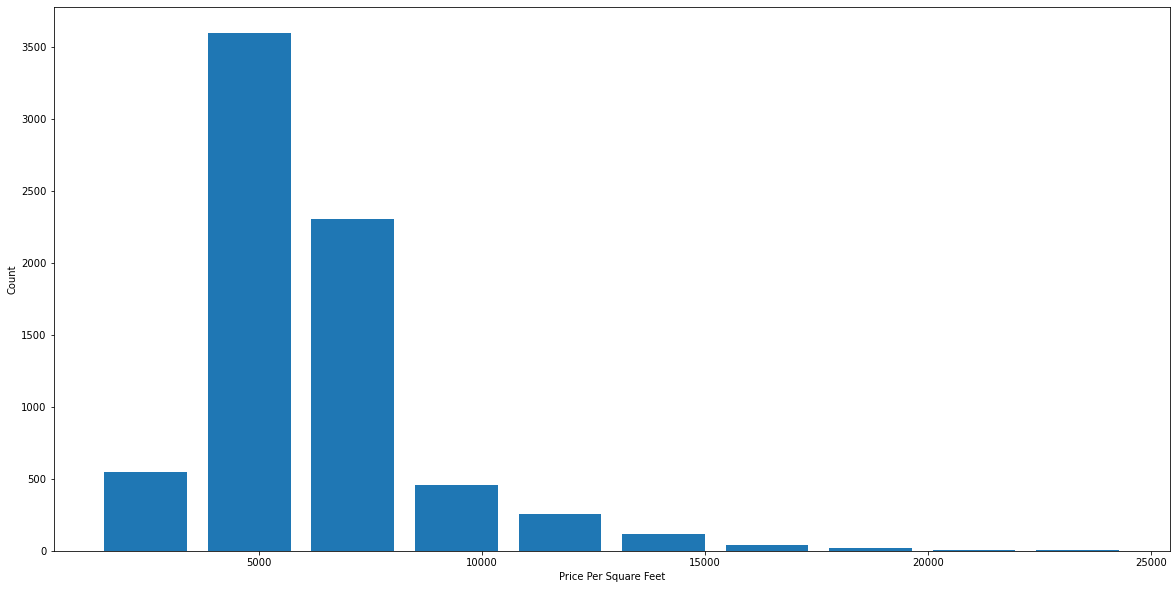

In [187]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [188]:
# Outlier Removal Using Bathrooms Feature
df8.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

Text(0, 0.5, 'Count')

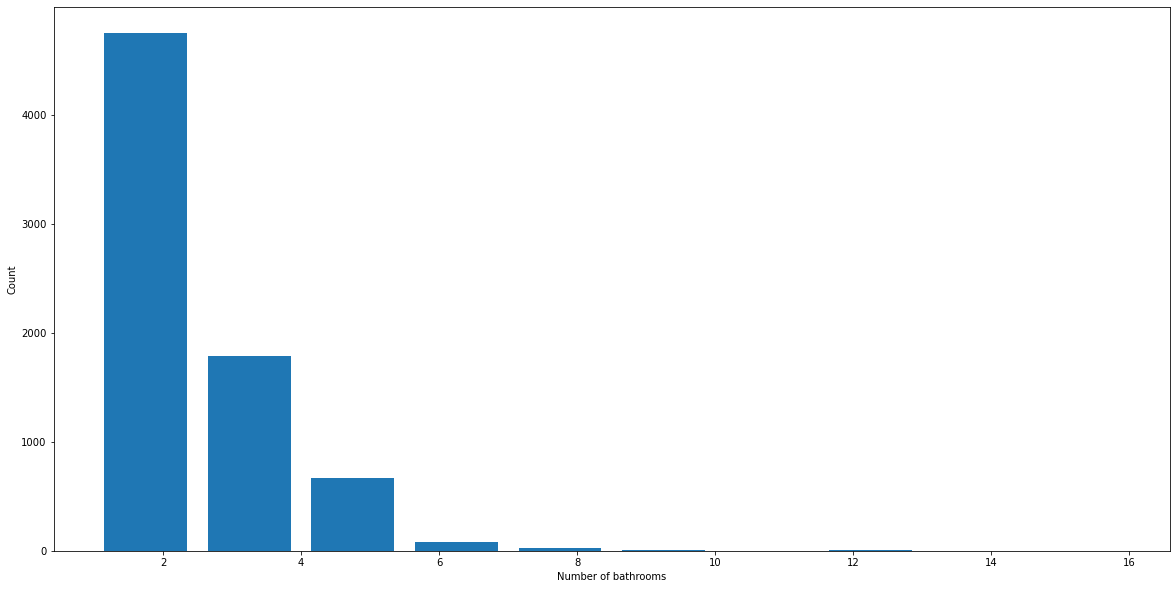

In [189]:
# Plot histogram
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [190]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8527,other,12000.0,12.0,525.0,10,4375.000000
8616,other,10000.0,16.0,550.0,16,5500.000000
9351,other,6000.0,12.0,150.0,11,2500.000000
9682,other,5425.0,13.0,275.0,13,5069.124424


In [191]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8452,other,11338.0,9.0,1000.0,6,8819.897689


In [192]:
# you will have total bath = total bed + 1 or 2 max. 
# Anything above that is an outlier or a data error and can be removed
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7264, 6)

Text(0, 0.5, 'Count')

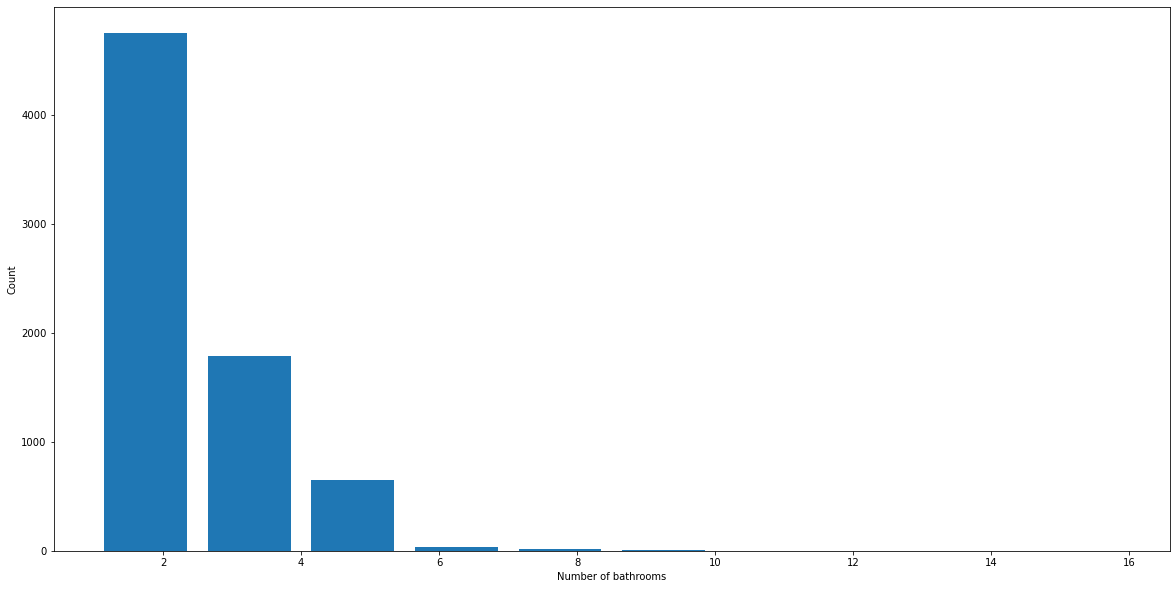

In [198]:
# Plot histogram
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [201]:
# Dropping price_per_sqft
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [208]:
# Creating n-1 dummy variables of location categorical variables by dropping 'other'
dummies = pd.get_dummies(df10.location)
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df12 = df11.drop('location',axis='columns')
display(HTML(df.head(5).to_html()))

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
# Final data set
df12.shape

(7264, 244)

In [216]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
X.shape

(7264, 243)

In [218]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [219]:
len(y)

7264

In [266]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import scipy as sp
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [268]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8239948793774188

In [269]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80788386, 0.77209153, 0.8443628 , 0.84201818, 0.82937422])

In [285]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.819146,{'normalize': True}
1,lasso,0.661082,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.691896,"{'criterion': 'mse', 'splitter': 'random'}"


In [274]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [275]:

predict_price('1st Phase JP Nagar',2825, 4, 4)

236.4161803422556

In [284]:
predict_price('1st Phase JP Nagar',1566, 2, 2)

130.52360388849706

In [286]:
# Export the tested model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [287]:
# Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))